In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import tensorflow as tf 
import numpy as np


In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.9.0


In [17]:
#PPO logs upload (Custom_PPO-unity-basic)
experiment_id = "m3vbfm1RTEe3tzDCgJnZwA "
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df0 = experiment.get_scalars()
df0

,run,tag,step,value
0,.,rollout/ep_len_mean,2048,34.711864
1,.,rollout/ep_len_mean,4096,27.190001
2,.,rollout/ep_len_mean,6144,20.610001
3,.,rollout/ep_len_mean,8192,17.389999
4,.,rollout/ep_len_mean,10240,13.500000
...,...,...,...,...
142,.,train/value_loss,18432,0.000393
143,.,train/value_loss,20480,0.000250
144,.,train/value_loss,22528,0.000091
145,.,train/value_loss,24576,0.000063


In [3]:
#PPO logs upload (hyperTurned-unity-basic)
experiment_id = "TbA5BlRnTzuBmDmRXwBzzw "
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,.,rollout/ep_len_mean,1024,2.435714e+01
1,.,rollout/ep_len_mean,2048,2.672000e+01
2,.,rollout/ep_len_mean,3072,2.515000e+01
3,.,rollout/ep_len_mean,4096,1.975000e+01
4,.,rollout/ep_len_mean,5120,1.510000e+01
...,...,...,...,...
166,.,train/value_loss,11264,8.744494e-07
167,.,train/value_loss,12288,3.865474e-06
168,.,train/value_loss,13312,6.310440e-09
169,.,train/value_loss,14336,3.621714e-13


In [4]:
#PPO logs upload (hyperturned-VizDoom-basic)
experiment_id = "MfXerCJPQv2kP6CWXbplaA "
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df1 = experiment.get_scalars()
df1

,run,tag,step,value
0,.,rollout/ep_len_mean,1024,12.936708
1,.,rollout/ep_len_mean,2048,6.930000
2,.,rollout/ep_len_mean,3072,5.520000
3,.,rollout/ep_len_mean,4096,4.530000
4,.,rollout/ep_len_mean,5120,4.690000
...,...,...,...,...
226,.,train/value_loss,16384,88.742714
227,.,train/value_loss,17408,25.429060
228,.,train/value_loss,18432,16.665003
229,.,train/value_loss,19456,106.559464


In [5]:
#AC2 logs upload (hyperturned-VizDoom-basic)
experiment_id = "dB8u7OGuQEewPd2twce4BQ "
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df2 = experiment.get_scalars()
df2

,run,tag,step,value
0,VizDoom_basic,rollout/ep_len_mean,3200,30.059999
1,VizDoom_basic,rollout/ep_len_mean,6400,25.350000
2,VizDoom_basic,rollout/ep_len_mean,9600,29.590000
3,VizDoom_basic,rollout/ep_len_mean,12800,26.469999
4,VizDoom_basic,rollout/ep_len_mean,16000,27.510000
...,...,...,...,...
91,VizDoom_basic,train/value_loss,25600,599.029663
92,VizDoom_basic,train/value_loss,28800,1108.367798
93,VizDoom_basic,train/value_loss,32000,3325.243164
94,VizDoom_basic,train/value_loss,35200,591.362549


In [6]:
#AC2 logs upload (hyperturned-VizDoom-basic)
experiment_id = "sbv7wYlfQ2ygoDr2eLrobA "
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df3 = experiment.get_scalars()
df3

,run,tag,step,value
0,.,rollout/ep_len_mean,140,35.000000
1,.,rollout/ep_len_mean,262,32.750000
2,.,rollout/ep_len_mean,430,35.833332
3,.,rollout/ep_len_mean,493,30.812500
4,.,rollout/ep_len_mean,739,36.950001
...,...,...,...,...
2869,.,train/loss,98849,1.785448
2870,.,train/loss,99003,1.670732
2871,.,train/loss,99303,0.592654
2872,.,train/loss,99603,1.686806


In [18]:
##PPO logs upload (Custom_PPO-unity-basic)
pivot0 = pd.pivot_table(df0, index='step', columns='tag', values='value')
pivot0

tag,rollout/ep_len_mean,rollout/ep_rew_mean,time/fps,train/approx_kl,train/clip_fraction,train/clip_range,train/entropy_loss,train/explained_variance,train/learning_rate,train/loss,train/policy_gradient_loss,train/value_loss
step,,,,,,,,,,,,
2048,34.711864,0.07322,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4096,27.190001,0.31410,99.0,0.006443,0.021582,0.2,-1.095640,-0.189689,0.0003,0.025764,-0.010941,0.097035
6144,20.610001,0.54190,98.0,0.011439,0.211865,0.2,-1.068707,0.339292,0.0003,0.009257,-0.033667,0.072505
8192,17.389999,0.77210,97.0,0.018544,0.439941,0.2,-1.007613,0.602247,0.0003,-0.091467,-0.055447,0.040554
10240,13.500000,0.82900,96.0,0.021624,0.368408,0.2,-0.898136,0.459526,0.0003,-0.051177,-0.059383,0.024400
12288,10.920000,0.88180,97.0,0.025147,0.372900,0.2,-0.758516,0.508989,0.0003,-0.034386,-0.056717,0.011508
14336,9.180000,0.89920,97.0,0.030261,0.227637,0.2,-0.598756,0.388872,0.0003,-0.038688,-0.040755,0.004487
16384,7.890000,0.92110,98.0,0.032555,0.164795,0.2,-0.398767,0.573220,0.0003,-0.041136,-0.040035,0.002190
18432,7.590000,0.92410,98.0,0.010409,0.073584,0.2,-0.272990,0.796671,0.0003,-0.028340,-0.026170,0.000393


In [7]:
##PPO logs upload (hyperTurned-unity-basic)
pivot1 = pd.pivot_table(df, index='step', columns='tag', values='value')
pivot1

tag,rollout/ep_len_mean,rollout/ep_rew_mean,time/fps,train/approx_kl,train/clip_fraction,train/clip_range,train/entropy_loss,train/explained_variance,train/learning_rate,train/loss,train/policy_gradient_loss,train/value_loss
step,,,,,,,,,,,,
1024,24.357143,0.006429,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048,26.719999,0.180800,79.0,1.019714e-02,0.154102,0.2,-1.089547,-0.017053,0.001411,-0.006846,-0.018767,9.535666e-02
3072,25.150000,0.433500,84.0,1.541620e-02,0.310156,0.2,-1.052948,0.259440,0.001411,0.023148,-0.030857,1.225632e-01
4096,19.750000,0.757500,87.0,1.705991e-02,0.350586,0.2,-0.986482,0.224259,0.001411,-0.054492,-0.037918,3.670401e-02
5120,15.100000,0.849000,88.0,1.762841e-02,0.314746,0.2,-0.879029,-0.121359,0.001411,-0.049199,-0.039313,6.533575e-03
6144,9.610000,0.903900,89.0,3.253933e-02,0.426562,0.2,-0.694009,0.465661,0.001411,-0.071230,-0.054498,2.242405e-03
7168,8.390000,0.916100,91.0,6.525537e-02,0.320703,0.2,-0.468991,0.617686,0.001411,-0.039137,-0.052352,5.213064e-04
8192,7.780000,0.922200,92.0,6.390758e-02,0.126660,0.2,-0.278571,0.684519,0.001411,-0.036290,-0.028227,3.090618e-04
9216,7.060000,0.929400,93.0,8.419798e-02,0.199902,0.2,-0.085610,0.762458,0.001411,-0.018638,-0.028785,2.338885e-04


In [8]:
##PPO logs upload (hyperturned-VizDoom-basic
pivot2 = pd.pivot_table(df1, index='step', columns='tag', values='value')
pivot2

tag,rollout/ep_len_mean,rollout/ep_rew_mean,time/fps,train/approx_kl,train/clip_fraction,train/clip_range,train/entropy_loss,train/explained_variance,train/learning_rate,train/loss,train/policy_gradient_loss,train/value_loss
step,,,,,,,,,,,,
1024,12.936708,38.556961,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2048,6.930000,73.010002,79.0,0.075940,0.382227,0.2,-0.662033,0.583663,0.000459,90.404060,0.002537,388.287567
3072,5.520000,80.239998,66.0,0.049659,0.435352,0.2,-0.616260,0.720685,0.000459,185.356018,-0.029196,589.676025
4096,4.530000,84.620003,61.0,0.072757,0.292480,0.2,-0.424807,0.468220,0.000459,61.230145,-0.019193,261.154144
5120,4.690000,83.370003,62.0,0.096139,0.219824,0.2,-0.291794,0.703115,0.000459,36.539791,-0.008057,98.858810
6144,3.390000,89.440002,61.0,0.026882,0.092578,0.2,-0.235206,0.623791,0.000459,48.609791,-0.013888,179.501877
7168,3.860000,87.489998,58.0,0.052021,0.104102,0.2,-0.101743,0.906068,0.000459,18.533417,0.016570,24.322611
8192,4.720000,83.949997,60.0,0.093100,0.072363,0.2,-0.079791,0.965302,0.000459,4.093453,-0.003986,13.072667
9216,4.830000,83.470001,60.0,0.061666,0.131738,0.2,-0.129537,0.817345,0.000459,14.184368,0.000291,80.015831


In [9]:
##A2C logs upload (hyperTurned-customer-A2C)
pivot3 = pd.pivot_table(df2, index='step', columns='tag', values='value')
pivot3

tag,rollout/ep_len_mean,rollout/ep_rew_mean,time/fps,train/entropy_loss,train/explained_variance,train/learning_rate,train/policy_loss,train/value_loss
step,,,,,,,,
3200,30.059999,-70.209999,39.0,-1.098258,-0.000715,0.000057,-25.933250,596.652954
6400,25.350000,-34.639999,39.0,-1.095201,0.000184,0.000057,-14.530583,1179.921143
9600,29.590000,-64.540001,37.0,-1.092870,-0.008328,0.000057,-25.805166,605.272339
12800,26.469999,-50.389999,37.0,-1.086869,-0.004494,0.000057,-20.604721,404.946686
16000,27.510000,-55.439999,36.0,-1.080335,-0.002897,0.000057,-9.208096,1240.255859
19200,24.629999,-36.840000,36.0,-1.077235,0.034167,0.000057,-12.010726,1275.928711
22400,26.700001,-49.869999,36.0,-1.074347,0.029177,0.000057,-8.222115,1521.670410
25600,26.969999,-51.490002,36.0,-1.074645,-0.034357,0.000057,-25.973518,599.029663
28800,30.590000,-75.419998,36.0,-1.077454,0.006292,0.000057,-2.434861,1108.367798


In [10]:
##DQN logs upload (hyperTurned-unity-basic)
pivot4 = pd.pivot_table(df3, index='step', columns='tag', values='value')
pivot4

tag,rollout/ep_len_mean,rollout/ep_rew_mean,rollout/exploration_rate,time/fps,train/learning_rate,train/loss
step,,,,,,
140,35.000000,-88.750000,0.986700,626.0,NaN,NaN
262,32.750000,-79.625000,0.975110,663.0,NaN,NaN
430,35.833332,-104.166664,0.959150,772.0,NaN,NaN
493,30.812500,-71.312500,0.953165,759.0,NaN,NaN
739,36.950001,-106.150002,0.929795,813.0,NaN,NaN
...,...,...,...,...,...,...
98849,69.410004,-273.429993,0.050000,89.0,0.002022,1.785448
99003,67.949997,-265.230011,0.050000,89.0,0.002022,1.670732
99303,67.949997,-265.630005,0.050000,88.0,0.002022,0.592654


In [11]:
import os
os.getcwd()

'C:\\Users\\jozim\\Downloads\\PPO_Logs'

In [12]:
csv_path = 'C:\\Users\\jozim\\Downloads\\PPO_Logs\\tb_experiment_1.csv'
df.to_csv(csv_path, index=False)
df_roundtrip = pd.read_csv(csv_path)
pd.testing.assert_frame_equal(df_roundtrip, df)

# Comparing a normal PPO in a custom scenary with a Hyperturbed 

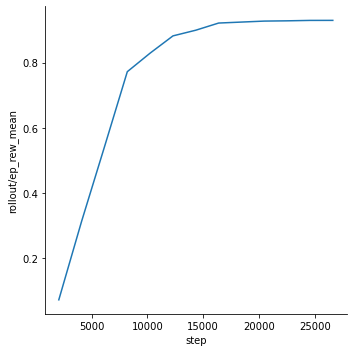

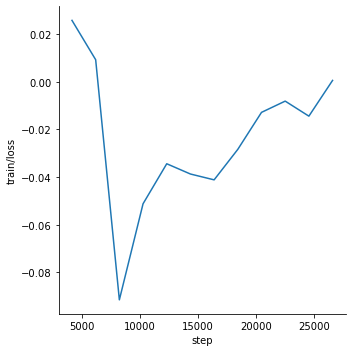

In [19]:
###PPO logs upload (Custom_PPO-unity-basic)
sns.relplot(x="step", y="rollout/ep_rew_mean", ci=None, kind="line", data=pivot0);
sns.relplot(x="step", y="train/loss", ci=None, kind="line", data=pivot0);

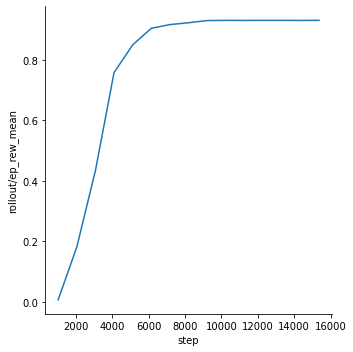

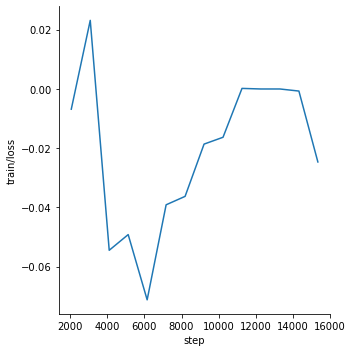

In [13]:
###PPO logs upload (hyperTurned-unity-basic)
sns.relplot(x="step", y="rollout/ep_rew_mean", ci=None, kind="line", data=pivot1);
sns.relplot(x="step", y="train/loss", ci=None, kind="line", data=pivot1);


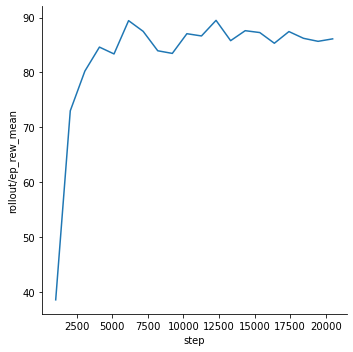

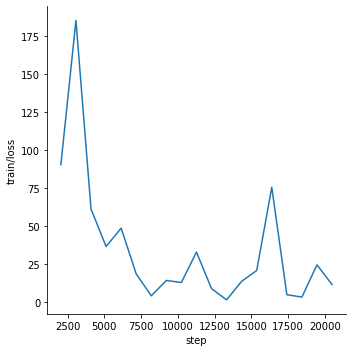

In [14]:
###PPO logs upload (hyperturned-VizDoom-basic)
sns.relplot(x="step", y="rollout/ep_rew_mean", ci=None, kind="line", data=pivot2);
sns.relplot(x="step", y="train/loss", ci=None, kind="line", data=pivot2);

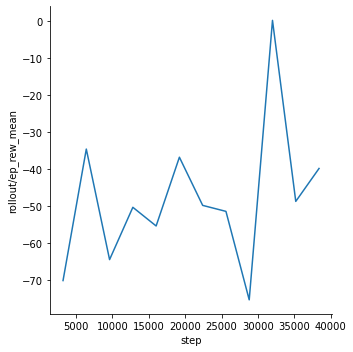

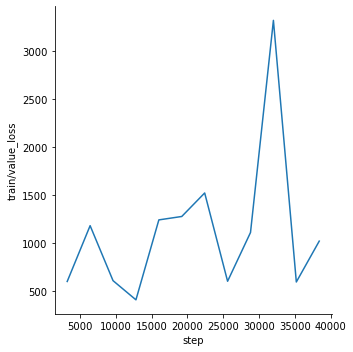

In [15]:
###A2C logs upload (hyperTurned-customer-A2C)
sns.relplot(x="step", y="rollout/ep_rew_mean", ci=None, kind="line", data=pivot3);
sns.relplot(x="step", y="train/value_loss", ci=None, kind="line", data=pivot3);

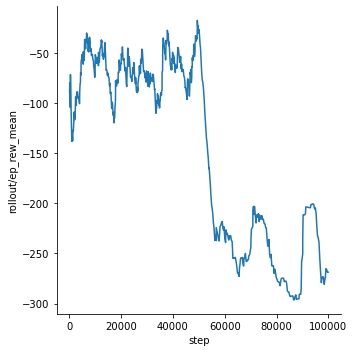

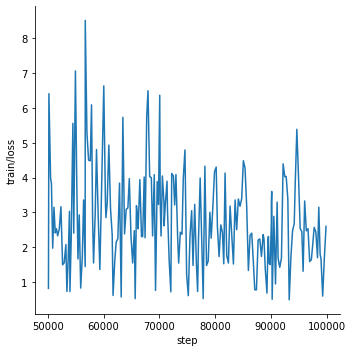

In [16]:
### DQN logs upload (hyperTurned-unity-basic)
sns.relplot(x="step", y="rollout/ep_rew_mean", ci=None, kind="line", data=pivot4);
sns.relplot(x="step", y="train/loss", ci=None, kind="line", data=pivot4);